In [44]:
def middle(x, y, z):
    if y < z:
        if x < y:
            return y
        elif x < z:
            return y
    else:
        if x > y:
            return y
        elif x > z:
            return x
    return z

In [45]:
import inspect

In [46]:
source = inspect.getsource(middle)
print(source)

def middle(x, y, z):
    if y < z:
        if x < y:
            return y
        elif x < z:
            return y
    else:
        if x > y:
            return y
        elif x > z:
            return x
    return z



In [47]:
middle_py = 'middle.py'
tmp_py = 'tmp.py'

In [48]:
with open(middle_py, 'w') as fp:
    fp.write(source)

In [49]:
from efdd.events import instrument

In [50]:
instrument(middle_py, tmp_py, "middle.json")

sflkit :: INFO     :: I found 82 events in middle.py.
sflkit :: INFO     :: I found 82 events in middle.py.


In [51]:
with open(tmp_py, 'r') as fp:
    print(fp.read())

import sflkitlib.lib

def middle(x, y, z):
    try:
        sflkitlib.lib.add_function_enter_event(0)
        sk_tmp_57b9b092_0 = None
        sflkitlib.lib.add_def_event(3, sflkitlib.lib.get_id(x), x, sflkitlib.lib.get_type(x))
        sflkitlib.lib.add_def_event(4, sflkitlib.lib.get_id(y), y, sflkitlib.lib.get_type(y))
        sflkitlib.lib.add_def_event(5, sflkitlib.lib.get_id(z), z, sflkitlib.lib.get_type(z))
        try:
            sflkitlib.lib.add_len_event(6, sflkitlib.lib.get_id(x), len(x))
        except (AttributeError, TypeError, NameError):
            pass
        try:
            sflkitlib.lib.add_len_event(7, sflkitlib.lib.get_id(y), len(y))
        except (AttributeError, TypeError, NameError):
            pass
        try:
            sflkitlib.lib.add_len_event(8, sflkitlib.lib.get_id(z), len(z))
        except (AttributeError, TypeError, NameError):
            pass
        sflkitlib.lib.add_test_def_event(9, sflkitlib.lib.get_id(x))
        sflkitlib.lib.add_test_

In [52]:
import subprocess

In [53]:
access_py = "middle_access.py"
def write_access(module):
    with open(access_py, 'w') as f:
        f.write(
            "import sys\n"
            f"import {module}\n"
            "\n"
            'if __name__ == "__main__":\n'
            f"    print({module}.middle(*list(map(int, sys.argv[1:]))))\n"
        )

write_access("middle")

In [54]:
subprocess.run(["python", access_py, "2", "3", "1"])

2


CompletedProcess(args=['python', 'middle_access.py', '2', '3', '1'], returncode=0)

In [55]:
from efdd.events import SystemtestEventCollector
from sflkit.features.handler import EventHandler
import os

In [56]:
passing, failing = (
    [
        ["3", "3", "5"],
        ["1", "2", "3"],
        ["3", "2", "1"],
        ["5", "5", "1"],
        ["5", "3", "4"],
    ],
    [
        ["2", "1", "3"]
    ]
)

In [57]:
write_access("tmp")

In [58]:
collector = SystemtestEventCollector(os.getcwd(), middle_py, access_py, mapping_path="middle.json")
events = collector.get_events((passing, failing))
handler = EventHandler()
handler.handle_files(events)
all_features = handler.builder.get_all_features()

In [59]:
from efdd.learning import DecisionTreeDiagnosis

In [60]:
diagnosis = DecisionTreeDiagnosis()
diagnosis.fit(
    all_features,
    handler,
)

In [61]:
explanation = diagnosis.explain()

In [62]:
import matplotlib.pyplot as plt
from heatmap import heatmap

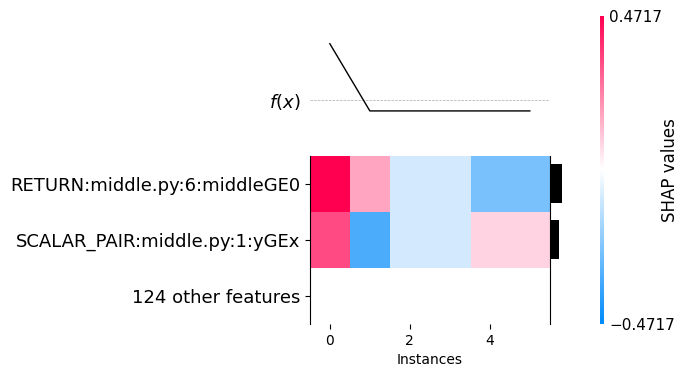

In [63]:
heatmap(explanation[:,:,1], max_display=3, show=False, plot_width=6.5)
plt.savefig("shap.pdf")

In [64]:
from sklearn import tree

[Text(0.4, 0.8333333333333334, 'RETURN:middle.py:6:middleGE0 <= 0.5\nsamples = 6\nvalue = [5, 1]\nclass = No Bug'),
 Text(0.2, 0.5, 'samples = 4\nvalue = [4, 0]\nclass = No Bug'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'SCALAR_PAIR:middle.py:1:yGEx <= 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No Bug'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'samples = 1\nvalue = [0, 1]\nclass = Bug'),
 Text(0.8, 0.16666666666666666, 'samples = 1\nvalue = [1, 0]\nclass = No Bug')]

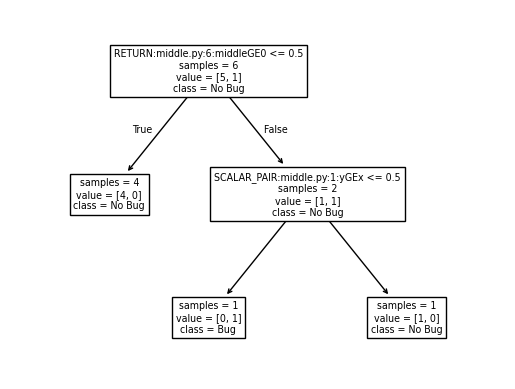

In [65]:
tree.plot_tree(
    diagnosis.model,
    feature_names=list(map(lambda f: f.name, all_features)), 
    class_names=["No Bug", "Bug"], 
    filled=False,
    impurity=False
)